In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [4]:
data_folder = '../data/2020-06-18_B-field_30min/'
f_names = os.listdir(data_folder)
data = {}
for f in f_names:
    key = f.split('_')[3][-2:] + '30m'
    s_t = pd.to_datetime('2020-06-18 ' + f.split('_')[3][:-2][-4:])
    df = pd.read_csv(data_folder + f, header=None, names=['B'])
    offset = float(f.split('_')[-1][:3])
    df['B'] = df['B'] * 100 + offset
    df['offset'] = offset
    df['t'] = pd.date_range(start=s_t, periods=len(df.index), freq='5ms')
    data[key] = df

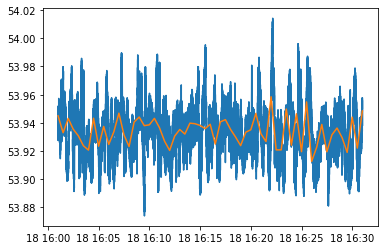

In [5]:
df = data['z+30m']
plt.plot(df['t'], df['B'])
df_rs = df.resample(rule='30S', on='t').mean().reset_index()
plt.plot(df_rs['t'], df_rs['B'])

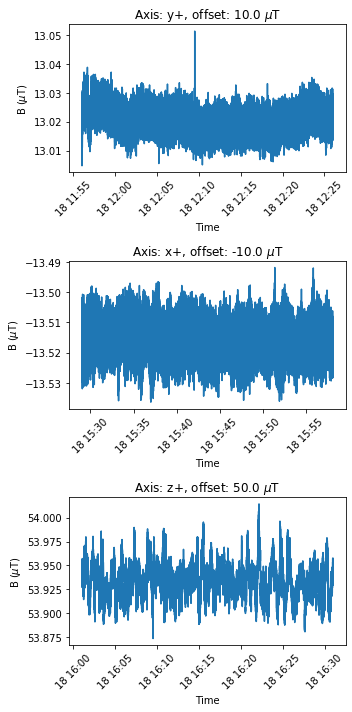

In [6]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(5, 10))
m30s = {k:v for k,v in data.items() if '30m' in k}
for (key, df), ax in zip(m30s.items(), axs):
    ax.plot(df['t'], df['B'])
    ax.set_ylabel(r"B ($\mu$T)")
    ax.set_xlabel("Time")
    ax.set_title(rf"Axis: {key[:2]}, offset: {df['offset'].iloc[0]} $\mu$T")
    ax.tick_params('x',labelrotation=45)
plt.tight_layout()
plt.savefig('../figs/B-field_30min.pdf', dpi=150)

0.14068603520000522


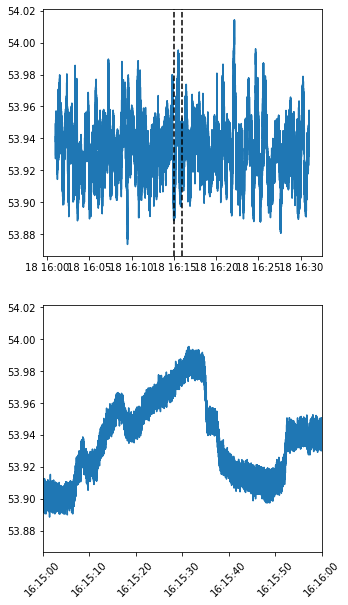

In [7]:
xlim_a = pd.to_datetime('2020-06-18 16:15:00.000')
xlim_b = pd.to_datetime('2020-06-18 16:16:00.000')
xlims = (xlim_a, xlim_b)
df = data['z+30m']
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(5,10))
axs[0].plot(df['t'], df['B'])
axs[0].axvline(xlim_a, linestyle='--', color='k')
axs[0].axvline(xlim_b, linestyle='--', color='k')
axs[1].plot(df['t'], df['B'])
axs[1].set_xlim(xlims)
axs[1].tick_params('x',labelrotation=45)
print(np.max(df['B']) - np.min(df['B']))

(array([-25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13,
        -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25]),
 array([0.59017158, 0.60656241, 0.62295471, 0.63934444, 0.65573971,
        0.67213347, 0.68852759, 0.70492999, 0.72132072, 0.73771333,
        0.75411366, 0.77050088, 0.78689742, 0.80329046, 0.81969023,
        0.83607441, 0.85246558, 0.86885735, 0.88524928, 0.90163798,
        0.91802909, 0.93442028, 0.9508097 , 0.96720909, 0.98359867,
        1.        , 0.98359867, 0.96720909, 0.9508097 , 0.93442028,
        0.91802909, 0.90163798, 0.88524928, 0.86885735, 0.85246558,
        0.83607441, 0.81969023, 0.80329046, 0.78689742, 0.77050088,
        0.75411366, 0.73771333, 0.72132072, 0.70492999, 0.68852759,
        0.67213347, 0.65573971, 0.63934444, 0.62295471, 0.60656241,
        0.59017158]),
 <matplot

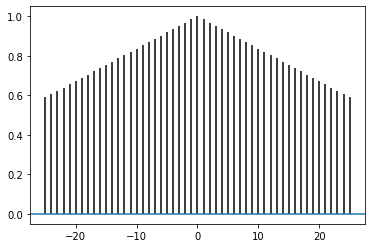

In [8]:
plt.acorr(df_rs['B'], maxlags=25)

In [9]:
df = data['y+30m']
(find_peaks(np.fft.fft(df['B'])[1:], height=100)[0] * 0.005) / 60

array([1.66666667e-04, 3.00218333e+01])

In [10]:
# huge measurement
data_folder = '../data/2020-06-18_B-field_weekend/'
f = 'meas_18_06_UTC1633z+_+50uT.txt'
s_t = pd.to_datetime('2020-06-18 ' + f.split('_')[3][:-2][-4:])
df_huge = pd.read_csv(data_folder + f, header=None, names=['B'])
offset = float(f.split('_')[-1][:3])
df_huge['B'] = df_huge['B'] * 100 + offset
df_huge['t'] = pd.date_range(start=s_t, periods=len(df_huge.index), freq='5ms')

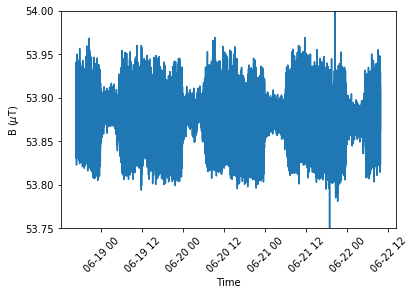

In [11]:
plt.plot(df_huge['t'], df_huge['B'])
plt.ylabel(r'B ($\mu$T)')
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylim([53.75, 54.0])
plt.savefig("../figs/B-field_midsummer.pdf", dpi=150)

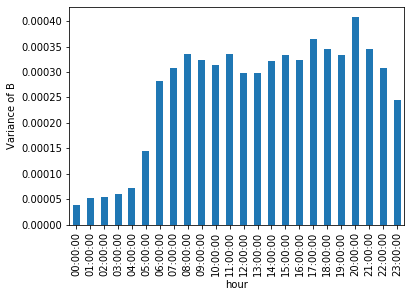

In [12]:
### hourly variance
df_huge['hour'] = df_huge['t'].dt.floor('H')
df_huge['hour'] = df_huge['hour'].dt.time
grouped = df_huge.groupby('hour')['B']
variances = grouped.var()
variances.plot.bar()
plt.ylabel(r'Variance of B')
plt.savefig("../figs/B-var_midsummer.pdf", dpi=150)

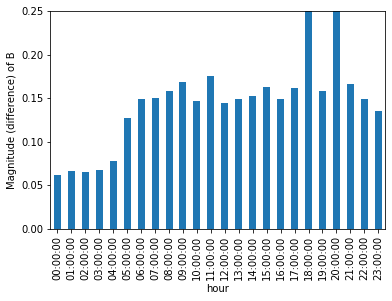

In [15]:
magnitude = grouped.max() - grouped.min()
magnitude.plot.bar()
plt.ylabel(r'Magnitude (difference) of B')
plt.ylim([0, .25])
plt.savefig("../figs/B-mag_midsummer.pdf", dpi=150)

In [11]:
np.max(df_huge['B']) - np.min(df_huge['B'])

1.207275390600003

In [29]:
data_folder = '../data/2020-06-23-B-field/'
f_names = os.listdir(data_folder)
for f in f_names:
    if not 'test' in f:
        key = f.split('_')[3][-2:] + ('flash' if 'flash' in f else 'long')
        s_t = pd.to_datetime(('2020-06-23 ' if '23' in f else '2020-06-24 ') + f.split('_')[3][:-2][-4:])
        df = pd.read_csv(data_folder + f, header=None, names=['B'])
        offset = float(f.split('_')[4][:3])
        df['B'] = df['B'] * 100 + offset
        df['offset'] = offset
        df['t'] = pd.date_range(start=s_t, periods=len(df.index), freq='5ms')
        data[key] = df

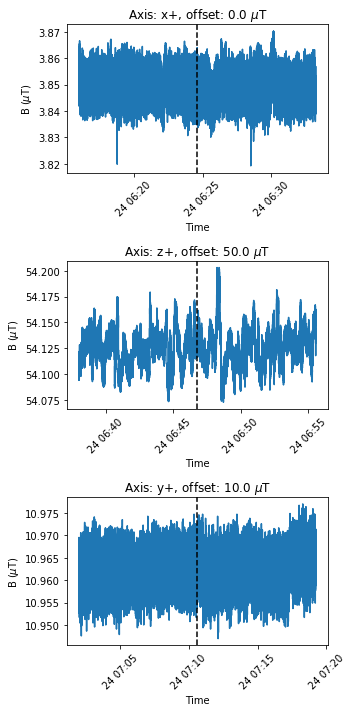

In [34]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(5, 10))
flashes = {k:v for k,v in data.items() if 'flash' in k}
for (key, df), ax in zip(flashes.items(), axs):
    ax.plot(df['t'], df['B'])
    ax.set_ylabel(r"B ($\mu$T)")
    ax.set_xlabel("Time")
    ax.set_title(rf"Axis: {key[:2]}, offset: {df['offset'].iloc[0]} $\mu$T")
    ax.tick_params('x',labelrotation=45)
    ax.axvline(df['t'].iloc[int(len(df.index)/2)], color='k', linestyle='--')
plt.tight_layout()
plt.savefig('../figs/B-field_flash.pdf', dpi=150)

In [31]:
data

{'y+30m':                 B  offset                       t
 0       13.017731    10.0 2020-06-18 11:56:00.000
 1       13.017883    10.0 2020-06-18 11:56:00.005
 2       13.015442    10.0 2020-06-18 11:56:00.010
 3       13.016968    10.0 2020-06-18 11:56:00.015
 4       13.015594    10.0 2020-06-18 11:56:00.020
 ...           ...     ...                     ...
 360261  13.023224    10.0 2020-06-18 12:26:01.305
 360262  13.022766    10.0 2020-06-18 12:26:01.310
 360263  13.022461    10.0 2020-06-18 12:26:01.315
 360264  13.022919    10.0 2020-06-18 12:26:01.320
 360265  13.020630    10.0 2020-06-18 12:26:01.325
 
 [360266 rows x 3 columns],
 'x+30m':                 B  offset                       t
 0      -13.518372   -10.0 2020-06-18 15:29:00.000
 1      -13.524475   -10.0 2020-06-18 15:29:00.005
 2      -13.516693   -10.0 2020-06-18 15:29:00.010
 3      -13.509827   -10.0 2020-06-18 15:29:00.015
 4      -13.517761   -10.0 2020-06-18 15:29:00.020
 ...           ...     ...        

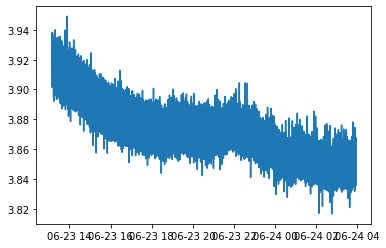

In [35]:
df = data['x+long']
plt.plot(df['t'], df['B'])